In [1]:
import json
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

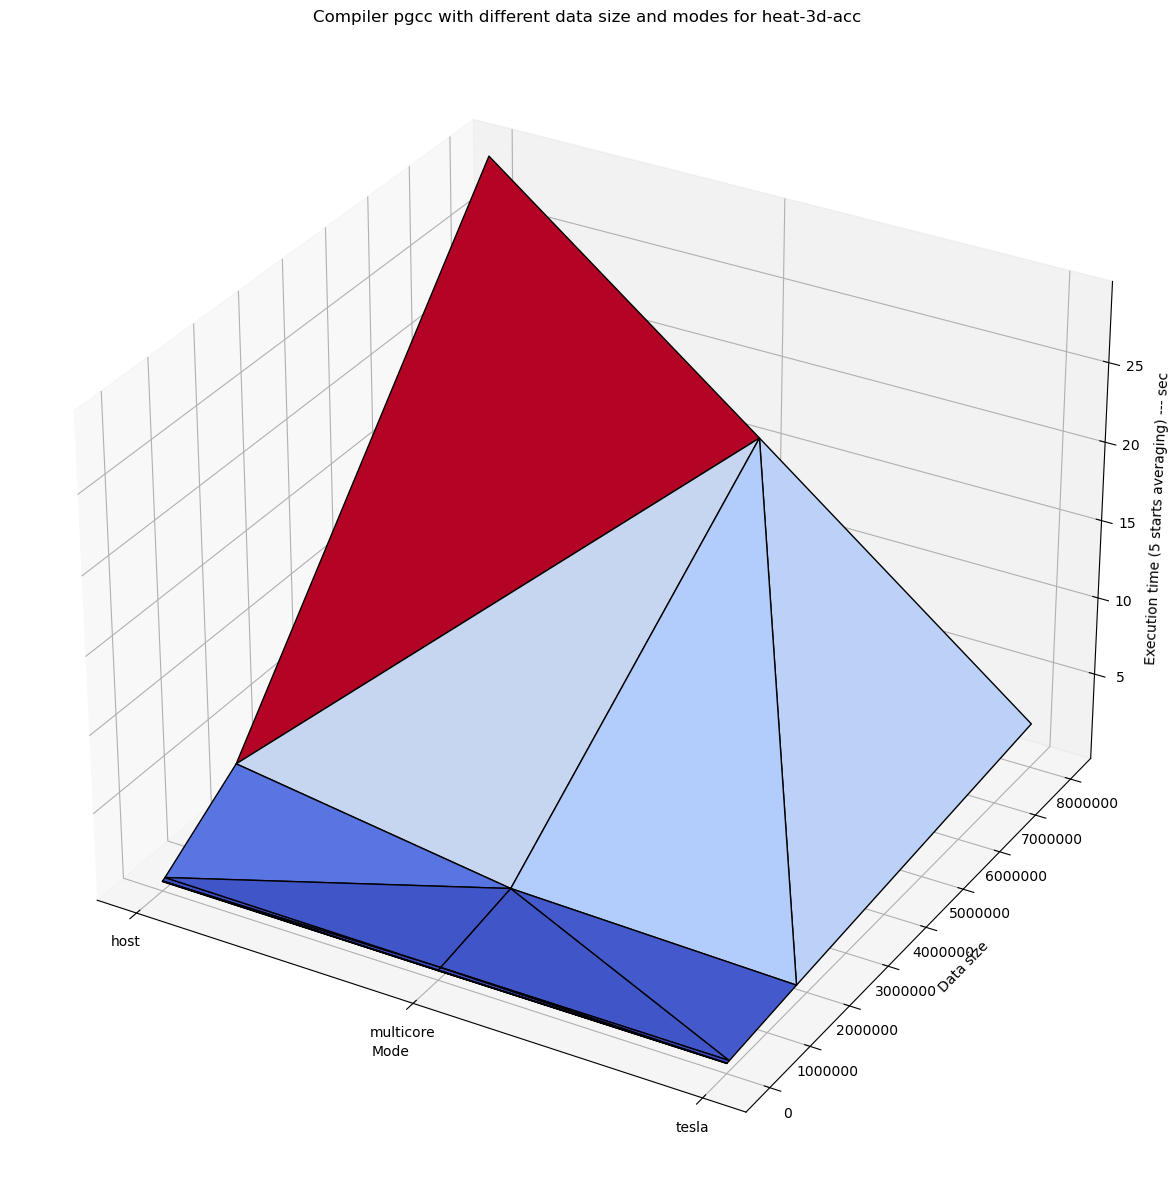

In [8]:
# read data for diff data plot
with open("diff_opt_data_orig.json") as fp:
    diff_data = json.load(fp)

data_levels = {
    "MINI_DATASET": 10 ** 3,
    "SMALL_DATASET": 20 ** 3,
    "MEDIUM_DATASET": 40 ** 3,
    "LARGE_DATASET": 120 ** 3,
    "EXTRALARGE_DATASET": 200 ** 3
}

for prog_name, prog_data in diff_data.items():
    for compiler_name, compiler_data in prog_data.items():
        # init plot
        plt.figure(figsize=(15, 15))
        ax = plt.axes(projection='3d')
        plt.title(f'Compiler {compiler_name} with different data size and modes for {prog_name}')

        # store data
        x, y, z = [], [], []
        for data_size, data_sizes_data in compiler_data.items():
            modes = {key: id for id, key in enumerate(data_sizes_data.keys())}
            for mode, value in data_sizes_data.items():
                x.append(int(modes[mode]))
                y.append(data_levels[data_size])
                z.append(value)

        ax.set_xlabel('Mode')
        ax.set_ylabel('Data size')
        ax.set_zlabel('Execution time (5 starts averaging) --- sec')

        ax.set_xticks([val for val in modes.values()])
        ax.set_xticklabels([key for key in modes.keys()])
        # ax.set_yticks([2 ** i + 2 for i in range(6, 10)])
        ax.ticklabel_format(axis="y", style='plain')
        ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, edgecolor='black')

        plt.savefig(f'images_gpu/diff_data_for_{prog_name}_with_{mode}.png')